<h2>FIN5615 Project #5
    <p class="text-primary">Black Scholes Options Pricing (Part II)</p>
</h2>

<div class = "panel panel-success">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Project Introduction</b>
    </div>
    <div class = "panel-body"> 
    The goal of this project is to build an options pricing calculator using the Black-Scholes pricing model. Our calculator will be able to price both put and call options as well as the following set of Greeks: delta, gamma, theta, vega, and rho. 
    </div>
</div>

<div class = "panel panel-info">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Instructions</b>
    </div>
    <div class = "panel-body"> 
    Please code you solutions directly in this Notebook under each task in the cells provided below. Include all code used to produce your results, and support your answers with textual explanations if neccessary. You may feel free to add additional Code and/or Markdown cells as needed. Code must be written using <b>Python 3</b>.
    <br><br>Please order the cells in your Notebook in the order in which they are intended to run! It is expected that your Notebook is able to run in sequence from start to finish without any errors (before submitting check by: <code>Kernel > Restart & Run All</code>).
    <br><br>Once ready, please submit your assignment as an <b>.ipynb file</b> (<code>File > Download as > Notebook</code>). You must name your files in the following format: <b><code>FIN5615_Project_1_Richard_Lee_tuc12345.ipynb</code></b>.
    </div>
</div>

---
<div class = "alert alert-block alert-warning">
    <b>Note</b>: Import all libraries that you plan on using in the code block below.
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm 

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 1</b>
    </div>
    <div class = "panel-body">
    Recall from the previous project, we coded the function <code>black_scholes_formula(stock_price, strike, term, rf, volatility, option, dividend = 0.)</code>, which returned the price of either a call or put option depending on the value of the input parameter <code>option</code>.
    <br><br>Write another function called <code>black_scholes_greeks</code> that takes in the same input parameters as <code>black_scholes_formula</code>, and calculates the option's greeks (delta, gamma, vega, theta, and rho) according to the below table :
    ![Task_6_Table.JPG](attachment:Task_6_Table.JPG)
    <br><br>Note that $N^{\prime}(x)$ is simply the probability density function of the normal distribution.
    <br><br>The output should be returned in the form of dictionary with the following keys: <code>delta</code>, <code>gamma</code>, <code>vega</code>, <code>theta</code>, <code>rho</code>, each storing the corresponding greek value for the option. Run <code>black_scholes_greeks</code> on a call option where:
    <ul>
        <li><code>stock_price</code> = \$30</li>
        <li><code>strike</code> = \$35</li>
        <li><code>term</code> = 6 months</li>
        <li><code>rf</code> = 1%</li>
        <li><code>volatility</code> = 0.2</li>
        <li><code>dividend</code> = 2.5%</li>
    </ul>
    Your function should return a dictionary output like this:
    ![Task_6_Output.JPG](attachment:Task_6_Output.JPG)
    <p style="text-align:right;">[20pts]</p>
    </div>
</div>

In [2]:
def black_scholes_formula(stock_price, strike, term, rf, volatility, option, dividend = 0):
    
    d1 = (1 / (volatility * np.sqrt(term))) * (np.log(stock_price / strike) + (rf - dividend + .5 * 
                                                                               (volatility ** 2)) * term)
    d2 = d1 - volatility * np.sqrt(term)
    
    if option == 'call':
        price = stock_price * np.exp(-dividend * term) * norm.cdf(d1, 0, 1) - \
                                        strike * np.exp(-rf * term) * norm.cdf(d2, 0, 1)
    elif option == 'put':
        price = strike * np.exp(-rf * term) * norm.cdf(-d2, 0, 1) - \
                                        stock_price * np.exp(-dividend * term) * norm.cdf(-d1, 0, 1)
    return price

In [3]:
def black_scholes_greeks(stock_price, strike, term, rf, volatility, option, dividend = 0):
    d1 = (1 / (volatility * np.sqrt(term))) * (np.log(stock_price / strike) + (rf - dividend + .5 * 
                                                                               (volatility ** 2)) * term)
    d2 = d1 - volatility * np.sqrt(term)
    
    greeks = dict()
    
    if option == 'call':
        greeks['delta'] = np.exp(-dividend * term) * norm.cdf(d1, 0, 1)
        greeks['gamma'] = norm.pdf(d1, 0, 1) * np.exp(-dividend * term) / (stock_price * volatility * np.sqrt(term))
        greeks['rho'] = strike * term * np.exp(-rf * term) * norm.cdf(d2, 0, 1)
        greeks['theta'] = -stock_price * norm.pdf(d1, 0, 1) * volatility * np.exp(-dividend * term) / \
                            (2 * np.sqrt(term)) + dividend * stock_price * norm.cdf(d1, 0, 1) * \
                            np.exp(-dividend * term) - rf * strike * np.exp(-rf * term) * norm.cdf(d2, 0, 1)
        greeks['vega'] = stock_price * norm.pdf(d1, 0, 1) * np.sqrt(term) * np.exp(-dividend * term)
    
    elif option == 'put':
        greeks['delta'] = np.exp(-dividend * term) * (-norm.cdf(-d1, 0, 1))
        greeks['gamma'] = norm.pdf(d1, 0, 1) * np.exp(-dividend * term) / (stock_price * volatility * np.sqrt(term))
        greeks['rho'] = -strike * term * np.exp(-rf * term) * norm.cdf(-d2, 0, 1)
        greeks['theta'] = -stock_price * norm.pdf(d1, 0, 1) * volatility * np.exp(-dividend * term) / \
                            (2 * np.sqrt(term)) - dividend * stock_price * norm.cdf(-d1, 0, 1) * \
                            np.exp(-dividend * term) + rf * strike * np.exp(-rf * term) * norm.cdf(-d2, 0, 1)
        greeks['vega'] = stock_price * norm.pdf(d1, 0, 1) * np.sqrt(term) * np.exp(-dividend * term)
        
    return greeks


In [4]:
greeks_results = black_scholes_greeks(stock_price = 30, strike = 35, term = .5, rf = .01, volatility = .2, 
                                                                            option = 'call', dividend = .025)

In [5]:
greeks_results

{'delta': 0.14002412854910162,
 'gamma': 0.05225745967362611,
 'rho': 1.957553740472613,
 'theta': -0.8747672525228961,
 'vega': 4.703171370626351}

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 2</b>
    </div>
    <div class = "panel-body"> 
    Modify the function <code>black_scholes_formula</code> to take in a <b>boolean</b> input parameter called <code>greeks</code> that can be either <code>True</code> or <code>False</code>, a default value of <code>False</code>.
    <br><br>If <code>greeks</code> is <code>True</code>, then in addition to producing the price of a call / put option, <code>black_scholes_formula</code> will also calculate the greeks of the option by calling the function <code>black_scholes_greeks</code> (<b><u>do not</u></b> code the formulas for the greeks again), and return the delta, gamma, vega, theta, and rho as a dictionary, in addition to the price of the option.
    <br><br>If <code>greeks</code> is <code>False</code>, then simply return the price of the option just like before. Run <code>black_scholes_formula</code> to price of a call option where:
    <ul>
        <li><code>stock_price</code> = \$30</li>
        <li><code>strike</code> = \$35</li>
        <li><code>term</code> = 6 months</li>
        <li><code>rf</code> = 1%</li>
        <li><code>volatility</code> = 0.2</li>
        <li><code>dividend</code> = 2.5%</li>
        <li><code>greeks</code> = True</li>
    </ul>
    Your function should return an output like this:
    ![Task_2_Output.JPG](attachment:Task_2_Output.JPG)
    <p style="text-align:right;">[20pts]</p>
    </div>
</div>

In [6]:
def black_scholes_formula(stock_price, strike, term, rf, volatility, option, dividend = 0, greeks = False):
    
    d1 = (1 / (volatility * np.sqrt(term))) * (np.log(stock_price / strike) + (rf - dividend + .5 * 
                                                                               (volatility ** 2)) * term)
    d2 = d1 - volatility * np.sqrt(term)
    
    if option == 'call' and greeks == True:
        price = stock_price * np.exp(-dividend * term) * norm.cdf(d1, 0, 1) - \
                                        strike * np.exp(-rf * term) * norm.cdf(d2, 0, 1)
        return price, greeks_results
    elif option == 'call' and greeks == False:
        price = stock_price * np.exp(-dividend * term) * norm.cdf(d1, 0, 1) - \
                                        strike * np.exp(-rf * term) * norm.cdf(d2, 0, 1)
    elif option == 'put' and greeks == True:
        price = strike * np.exp(-rf * term) * norm.cdf(-d2, 0, 1) - \
                                        stock_price * np.exp(-dividend * term) * norm.cdf(-d1, 0, 1)
        return price, greeks_results
    elif option == 'put' and greeks == False:
        price = strike * np.exp(-rf * term) * norm.cdf(-d2, 0, 1) - \
                                        stock_price * np.exp(-dividend * term) * norm.cdf(-d1, 0, 1)
    return price


In [7]:
price_greeks = black_scholes_formula(stock_price = 30, strike = 35, term = .5, rf = .01, volatility = .2, 
                                                             option = 'call', dividend = .025, greeks = True)

In [8]:
price_greeks

(0.2856163755278227,
 {'delta': 0.14002412854910162,
  'gamma': 0.05225745967362611,
  'rho': 1.957553740472613,
  'theta': -0.8747672525228961,
  'vega': 4.703171370626351})

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 3</b>
    </div>
    <div class = "panel-body"> 
    One of the assumptions to the Black-Scholes pricing model is that the risk-free interest rate is constant. However in practice, interest rates should follow a term structure, such as the spot curve.
    <br><br>Assume that the spot curve follows the below formula:
    <br><br>
    $$r(t) = \beta_0 + \beta_1\left(\frac{1 - e^{-\alpha t}}{\alpha t}\right) + \beta_2\left(\frac{1 - e^{-\alpha t}}{\alpha t} - e^{-\alpha t}\right)$$
    <br>Note that resulting $r(t)$ is expressed as a percentage. Set the parameters equal to the following values:
    <ul>
        <li>$\alpha = .7143$</li>
        <li>$\beta_0 = 2.99$</li>
        <li>$\beta_1 = -2.70$</li>
        <li>$\beta_2 = -2.12$</li>
    </ul>
    <br>Next:
    <ul>
        <li>Write a function that takes in <code>term</code> as an input parameter, then calculates and returns the spot rate according to the formula above.</li>
        <li>Plot the spot curve for terms ranging from 1 quarter to 30 years in quarterly increments on a line plot. Provide axis labels and a title for the plot. Your final plot should look something like this:
        ![Task_7_Plot.JPG](attachment:Task_7_Plot.JPG)</li>
        <li>Comment on the shape and reasonableness of this calculated spot curve. </li>
    </ul>
    <p style="text-align:right;">[20pts]</p>
    </div>
</div>

In [9]:
def spot_curve_formula(alpha, beta0, beta1, beta2, term):
    
    spot_curve = beta0 + beta1 * ((1 - np.exp(-alpha * term)) / (alpha * term)) + beta2 * \
                                    ((1 - np.exp(-alpha * term)) / (alpha * term) - (np.exp(-alpha * term)))
    return spot_curve

T = np.arange(.25, 30.25, .25)
spot_rate = spot_curve_formula(alpha = .7143, beta0 = 2.99, beta1 = -2.70, beta2 = -2.12, term = T)

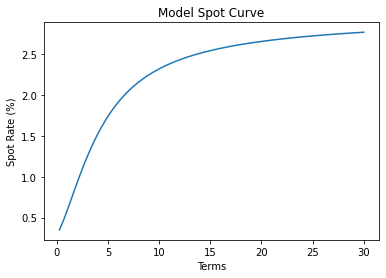

In [10]:
plt.plot(T, spot_rate)
plt.title('Model Spot Curve')
plt.xlabel('T')
plt.ylabel('Spot Rate (%)')
plt.show()

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 4</b>
    </div>
    <div class = "panel-body"> 
    Modify the function <code>black_scholes_formula</code> to use the spot rate outputted from the function in the previous task as the appropriate risk-free rate in our Black-Scholes formula based on the term of the options contract.
    <br><br>Note that this means <code>rf</code> will no longer be an input to the <code>black_scholes_formula</code> function. Run <code>black_scholes_formula</code> to price the following options:
    <ul>
        <li>A call option where the stock price is \$30, strike is \$35, term is 9 months, volatility is 20%, that also pays a 2.5% annual dividend, with <code>greeks</code> set to <code>True</code>. Check that your function prices this option at approximately \$0.4822.</li>
        <li>A put option where the stock price is \$35, strike is \$30, term is 2 years, volatility is 20%, that also pays a 2.5% annual dividend, with <code>greeks</code> set to <code>True</code>. Check that your function prices this option at approximately \$1.9289.</li>
    </ul>
    <p style="text-align:right;">[20pts]</p>
    </div>
</div>

In [11]:
def black_scholes_formula(stock_price, strike, term, volatility, option, dividend = 0, greeks = False):
    
    rf = spot_curve_formula(alpha = .7143, beta0 = 2.99, beta1 = -2.70, beta2 = -2.12, term = term) / 100
    
    d1 = (1 / (volatility * np.sqrt(term))) * (np.log(stock_price / strike) + (rf - dividend + .5 * 
                                                                               (volatility ** 2)) * term)
    d2 = d1 - volatility * np.sqrt(term)

    if option == 'call' and greeks == True:
        price = stock_price * np.exp(-dividend * term) * norm.cdf(d1, 0, 1) - \
                                        strike * np.exp(-rf * term) * norm.cdf(d2, 0, 1)
        return price, greeks_results
    elif option == 'call' and greeks == False:
        price = stock_price * np.exp(-dividend * term) * norm.cdf(d1, 0, 1) - \
                                        strike * np.exp(-rf * term) * norm.cdf(d2, 0, 1)
    elif option == 'put' and greeks == True:
        price = strike * np.exp(-rf * term) * norm.cdf(-d2, 0, 1) - \
                                        stock_price * np.exp(-dividend * term) * norm.cdf(-d1, 0, 1)
        return price, greeks_results
    elif option == 'put' and greeks == False:
        price = strike * np.exp(-rf * term) * norm.cdf(-d2, 0, 1) - \
                                        stock_price * np.exp(-dividend * term) * norm.cdf(-d1, 0, 1)
    return price


In [12]:
call = black_scholes_formula(stock_price = 30, strike = 35, term = .75, volatility = .2, 
                                                             option = 'call', dividend = .025, greeks = True)

In [13]:
call

(0.48218332751282755,
 {'delta': 0.14002412854910162,
  'gamma': 0.05225745967362611,
  'rho': 1.957553740472613,
  'theta': -0.8747672525228961,
  'vega': 4.703171370626351})

In [14]:
put = black_scholes_formula(stock_price = 35, strike = 30, term = 2, volatility = .2, 
                                                             option = 'put', dividend = .025, greeks = True)

In [15]:
put

(1.928873211758626,
 {'delta': 0.14002412854910162,
  'gamma': 0.05225745967362611,
  'rho': 1.957553740472613,
  'theta': -0.8747672525228961,
  'vega': 4.703171370626351})

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 5</b>
    </div>
    <div class = "panel-body"> 
    On June 30th, 2020, the AAPL's stock price was valued at \$364.14 and paying a dividend yield of 0.9%. On that same day, a call option on AAPL with a strike of \$380, expiring in 6-months was trading at \$26.
    <br><br>Estimate the implied volatility on this call option using the bisection method with a tolerance of $0.001 on the error of the calculated Black-Scholes call option price. Set <code>option</code> to <code>call</code> and <code>greeks</code> to <code>False</code> when calling the function <code>black_scholes_formula</code>.
    <br><br>Your final estimated implied volatility should be approximately 0.3228.
    <p style="text-align:right;">[20pts]</p>
    </div>
</div>

In [16]:
call = black_scholes_formula(stock_price = 364.14, strike = 380, term= .5, volatility = .15, option = 'call', dividend = .009, greeks = False)

left_volatility = .1
right_volatility = .50
tol = 26 - call
while abs(tol) > 0.001:
    volatility = (left_volatility + right_volatility) / 2
    call = black_scholes_formula(stock_price = 364.14, strike = 380, term = .5, volatility = volatility, 
                                 option = 'call', dividend = .009, greeks = False)
    tol = 26 - call
    
    if tol > 0:
        left_volatility = volatility
    else:
        right_volatility = volatility

In [17]:
volatility

0.32280273437499996